# Verwerken van experimentele data

In dit notebook geven we een voorbeeld van het verwerken van experimentele data.

* de meetgegevens vullen we direct in in een Python tabel; dit kan ook op veel andere manieren, bijvoorbeeld door deze uit een tekstbestand in te lezen.
* deze tabel geven we weer als pandas-tabel; 
* we gebruiken matplotlib voor het tekenen van een grafiek, met een raster voor het lezen van de waarden uit de grafiek;
* we gebruiken lineaire regressie voor het bepalen van het lineaire verband tussen de meetwaarden;
* hiermee tekenen we de benaderende funcie

Als voorbeeld gebruiken we een (fictieve) meting aan een weerstand, met een spanningsmeter parallel aan de weerstand, en een stroommeter in serie met de weerstand. De voeding van de schakeling kunnen we regelen: we meten de spanning en de stroom bij een aantal verschillende instellingen van de voeding.

We gebruiken de volgende libraries: 

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import ipysheet
import ipywidgets as widgets
import pandas as pd

## De experimentele data

De variabele `measurements` bevat de experimentele data: een array van (spanning, stroom)-metingen.
De spanning is in 0.1V, de stroom in mA.

> *Opmerking*: dit moet nog aangepast worden naar "fatsoenlijke eenheden", maar dat leverde in eerste instantie problemen met de assen van de grafieken. Nog uitzoeken hoe dat beter kan!


In [2]:
measurements = np.array([ [10.0, 15.1], [20.0, 19.7], [30.0, 29.5], [40.0, 39.5],[50.0, 51.2]])

We geven deze meetwaarden weer als tabel. Voor tabellen is pandas een handige en flexibele library.

In [3]:
data = pd.DataFrame(data = measurements, columns=["U", 'I'])
data

,U,I
0,10.0,15.1
1,20.0,19.7
2,30.0,29.5
3,40.0,39.5
4,50.0,51.2


De variabelen `measured_u` en `measured_v` zijn de kolommen met de gemeten spanning en stroom. We gebruiken deze bijvoorbeeld voor de x- en y-waarden in de grafiek.

In [4]:
measured_u = measurements[:,0]
measured_i = measurements[:,1]

### Sheet voor uitvoer/invoer

Met behulp van een sheet kunnen we de gegevens weergeven.
We kunnen via dit sheet de data aanpassen.

> In een meer bruikbare versie kunnen we zo'n sheet gebruiken voor de invoer van de data. De data kunnen we dan bewaren in een bestand, dat we een volgende keer weer inlezen in het notebook. Op die manier scheiden we de data van het notebook.

In [5]:
sheet = ipysheet.from_dataframe(data)
sheet

Sheet(cells=(Cell(choice=[], column_end=0, column_start=0, row_end=4, row_start=0, squeeze_row=False, type='nu…

In [6]:
df = ipysheet.to_dataframe(sheet)
measured_u = df['U'].values
measured_i = df['I'].values

## De grafiek

Met behulp van matplotlib maken we een grafiek van deze experimentele data.


In [7]:
def make_plot1(x, y):

    fig, ax = plt.subplots(figsize=(8, 8))

    plt.axis("equal") # for square grid (correct angles)
    plt.xlabel("U (0.1 V)")
    plt.ylabel("I (mA)")
    plt.title("I as function of V for resistor R")
    
    # Major ticks every 2 minor ticks every 1
    major_ticks = np.arange(0, 60, 5)
    minor_ticks = np.arange(0, 60, 1)

    ax.set_xticks(major_ticks)
    ax.set_xticks(minor_ticks, minor=True)
    ax.set_yticks(major_ticks)
    ax.set_yticks(minor_ticks, minor=True)

    # And a corresponding grid
    plt.grid(which='minor', color="b", alpha=0.2)
    plt.grid(which='major', color='b', alpha=0.6)
    
    plt.ylim(0, 60)
    plt.xlim(0, 60)

    plt.plot(x, y, 'ro') # de meetpunten.
    
    # plt.grid(True)
    plt.show()

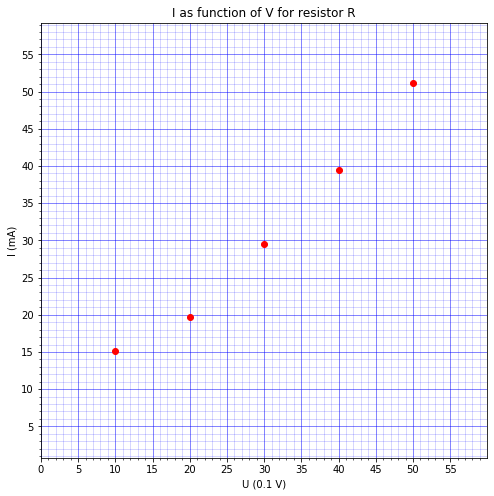

In [8]:
make_plot1(measured_u, measured_i)

## Lineaire regressie: best passende lijn

Met behulp van lineaire regressie bepalen we de best-passende lijn door deze meetpunten.
Het punt (0,0) ligt vast: we weten zeker dat als de spanning 0 is, de stroom ook 0 zal zijn.
We gebruiken dus een vorm van lineaire regressie waarbij de "intercept", het snijpunt met de y-as, vastligt (op 0).
Dit is een toepassing van de "kleinste kwadraten methode". 
(Zie: 

In [9]:
x = measured_u[:,np.newaxis]
y = measured_i
a, _, _, _ = np.linalg.lstsq(x, y, rcond=None)
a

array([1.01272727])

In [10]:
r = a[0]
r

1.0127272727272723

De waarde `a[0]` is de gezochte coefficient $R$ in $U = R \times I$: de waarde van de weerstand. Omdat we de spanning gemeten hebben in 0.1V en de stroom in mA, is de waarde van de weerstand: R = r * 100 (Ohm).

In [11]:
print("De weerstand R is ", "{:.1f}".format(r * 100) , ' Ohm')

De weerstand R is  101.3  Ohm


## Grafiek met benaderende lijn

We geven hieronder de grafiek met de meetpunten en de lijn die we bepaald hebben met behulp van lineaire regressie.

In [12]:
def make_plot2(x, y, a):

    fig, ax = plt.subplots(figsize=(8, 8))

    plt.axis("equal") # for square grid (correct angles)
    plt.xlabel("U (0.1 V)")
    plt.ylabel("I (mA)")
    
    # Major ticks every 2 minor ticks every 1
    major_ticks = np.arange(0, 60, 5)
    minor_ticks = np.arange(0, 60, 1)

    ax.set_xticks(major_ticks)
    ax.set_xticks(minor_ticks, minor=True)
    ax.set_yticks(major_ticks)
    ax.set_yticks(minor_ticks, minor=True)

    # And a corresponding grid
    plt.grid(which='minor', color="b", alpha=0.2)
    plt.grid(which='major', color='b', alpha=0.6)
    
    plt.ylim(0, 60)
    plt.xlim(0, 60)

    plt.plot(x, y, 'ro') # de meetpunten.
    pts = np.arange(0, 60, 1)
    plt.plot(pts, a * pts, 'b-')
    plt.suptitle("I as function of V for resistor R")
    
    # plt.grid(True)
    plt.show()

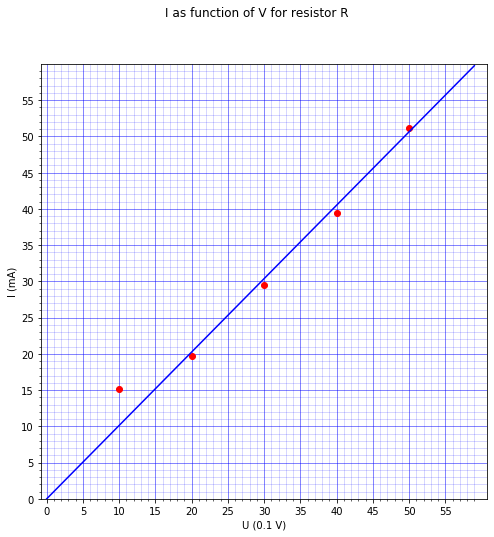

In [13]:
make_plot2(measured_u, measured_i, a)

## Opdracht

* welke meting valt uit de toon?
* heb je een verklaring voor deze meetfout?
* herhaal deze meting, vul de nieuwe waarde in, en herhaal de berekeningen.
* welk verschil maakt dit voor bepaalde waarde van de weerstand?
